In [1]:
import pandas as pd
parquet_filename = "detection_results_train_chunk_0.parquet"
df = pd.read_parquet(f"parquets/{parquet_filename}")

In [2]:
df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.839814   
1       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.813446   
2       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.807047   
3       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.773999   
4       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.755840   
...                                                   ...      ...       ...   
999995  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.732610   
999996  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.616251   
999997  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.604764   
999998  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.556185   
999999  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.521048   

         x1   y1   x2   y2  
0        39  719  292  990  
1        18  146  212  595  
2       257  695  424  945  
3       172  212  326  591  
4       664  196  896  490  
...     ...  ...  ...  ...  
999995  333  241  430  516  
999996  352  211  416  295  
999997  798  343  875  480  
999998  726  247  813  480  
999999  617  219  689  301  

[1000000 rows x 7 columns]

# Preprocess

In [3]:
# Mapping of values
mapping = {0: 'person', 1: 'head', 2: 'hand', 3: 'face'}

# Apply the mapping
df['label'] = df['classid'].map(mapping)

# List of values to filter by
filter_list = ['person', 'face']

# Filtering the DataFrame
df = df[df['label'].isin(filter_list)]


# filename_filter = ['/workspace/yolo_v8_training/oiv7_full/train/fba14789f51d7b37.jpg']
# df = df[df['filename'].isin(filename_filter)]

df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.839814   
1       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.813446   
2       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.807047   
3       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.773999   
4       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.755840   
...                                                   ...      ...       ...   
999995  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.732610   
999996  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.616251   
999997  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.604764   
999998  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.556185   
999999  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.521048   

         x1   y1   x2   y2   label  
0        39  719  292  990  person  
1        18  146  212  595  person  
2       257  695  424  945  person  
3       172  212  326  591  person  
4       664  196  896  490  person  
...     ...  ...  ...  ...     ...  
999995  333  241  430  516  person  
999996  352  211  416  295  person  
999997  798  343  875  480  person  
999998  726  247  813  480  person  
999999  617  219  689  301  person  

[533448 rows x 8 columns]

In [4]:
df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.839814   
1       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.813446   
2       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.807047   
3       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.773999   
4       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.755840   
...                                                   ...      ...       ...   
999995  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.732610   
999996  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.616251   
999997  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.604764   
999998  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.556185   
999999  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.521048   

         x1   y1   x2   y2   label  
0        39  719  292  990  person  
1        18  146  212  595  person  
2       257  695  424  945  person  
3       172  212  326  591  person  
4       664  196  896  490  person  
...     ...  ...  ...  ...     ...  
999995  333  241  430  516  person  
999996  352  211  416  295  person  
999997  798  343  875  480  person  
999998  726  247  813  480  person  
999999  617  219  689  301  person  

[533448 rows x 8 columns]

In [5]:
# Convert bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2
df['w'] = df['x2'] - df['x1']
df['h'] = df['y2'] - df['y1']

/tmp/ipykernel_80772/1172413626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cx'] = (df['x1'] + df['x2']) / 2
/tmp/ipykernel_80772/1172413626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cy'] = (df['y1'] + df['y2']) / 2
/tmp/ipykernel_80772/1172413626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [6]:
df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.839814   
1       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.813446   
2       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.807047   
3       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.773999   
4       /workspace/yolo_v8_training/oiv7_full/train/00...        0  0.755840   
...                                                   ...      ...       ...   
999995  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.732610   
999996  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.616251   
999997  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.604764   
999998  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.556185   
999999  /workspace/yolo_v8_training/oiv7_full/train/14...        0  0.521048   

         x1   y1   x2   y2   label     cx     cy    w    h  
0        39  719  292  990  person  165.5  854.5  253  271  
1        18  146  212  595  person  115.0  370.5  194  449  
2       257  695  424  945  person  340.5  820.0  167  250  
3       172  212  326  591  person  249.0  401.5  154  379  
4       664  196  896  490  person  780.0  343.0  232  294  
...     ...  ...  ...  ...     ...    ...    ...  ...  ...  
999995  333  241  430  516  person  381.5  378.5   97  275  
999996  352  211  416  295  person  384.0  253.0   64   84  
999997  798  343  875  480  person  836.5  411.5   77  137  
999998  726  247  813  480  person  769.5  363.5   87  233  
999999  617  219  689  301  person  653.0  260.0   72   82  

[533448 rows x 12 columns]

In [7]:
df = df[['filename', 'score', 'cx', 'cy', 'w', 'h', 'label']]
df

filename     score     cx  \
0       /workspace/yolo_v8_training/oiv7_full/train/00...  0.839814  165.5   
1       /workspace/yolo_v8_training/oiv7_full/train/00...  0.813446  115.0   
2       /workspace/yolo_v8_training/oiv7_full/train/00...  0.807047  340.5   
3       /workspace/yolo_v8_training/oiv7_full/train/00...  0.773999  249.0   
4       /workspace/yolo_v8_training/oiv7_full/train/00...  0.755840  780.0   
...                                                   ...       ...    ...   
999995  /workspace/yolo_v8_training/oiv7_full/train/14...  0.732610  381.5   
999996  /workspace/yolo_v8_training/oiv7_full/train/14...  0.616251  384.0   
999997  /workspace/yolo_v8_training/oiv7_full/train/14...  0.604764  836.5   
999998  /workspace/yolo_v8_training/oiv7_full/train/14...  0.556185  769.5   
999999  /workspace/yolo_v8_training/oiv7_full/train/14...  0.521048  653.0   

           cy    w    h   label  
0       854.5  253  271  person  
1       370.5  194  449  person  
2       820.0  167  250  person  
3       401.5  154  379  person  
4       343.0  232  294  person  
...       ...  ...  ...     ...  
999995  378.5   97  275  person  
999996  253.0   64   84  person  
999997  411.5   77  137  person  
999998  363.5   87  233  person  
999999  260.0   72   82  person  

[533448 rows x 7 columns]

In [8]:
df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)
df

/tmp/ipykernel_80772/324714309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)


filename     score  col_x  \
0       /workspace/yolo_v8_training/oiv7_full/train/00...  0.839814  165.5   
1       /workspace/yolo_v8_training/oiv7_full/train/00...  0.813446  115.0   
2       /workspace/yolo_v8_training/oiv7_full/train/00...  0.807047  340.5   
3       /workspace/yolo_v8_training/oiv7_full/train/00...  0.773999  249.0   
4       /workspace/yolo_v8_training/oiv7_full/train/00...  0.755840  780.0   
...                                                   ...       ...    ...   
999995  /workspace/yolo_v8_training/oiv7_full/train/14...  0.732610  381.5   
999996  /workspace/yolo_v8_training/oiv7_full/train/14...  0.616251  384.0   
999997  /workspace/yolo_v8_training/oiv7_full/train/14...  0.604764  836.5   
999998  /workspace/yolo_v8_training/oiv7_full/train/14...  0.556185  769.5   
999999  /workspace/yolo_v8_training/oiv7_full/train/14...  0.521048  653.0   

        row_y  width  height   label  
0       854.5    253     271  person  
1       370.5    194     449  person  
2       820.0    167     250  person  
3       401.5    154     379  person  
4       343.0    232     294  person  
...       ...    ...     ...     ...  
999995  378.5     97     275  person  
999996  253.0     64      84  person  
999997  411.5     77     137  person  
999998  363.5     87     233  person  
999999  260.0     72      82  person  

[533448 rows x 7 columns]

# Verify Bbox Conversion

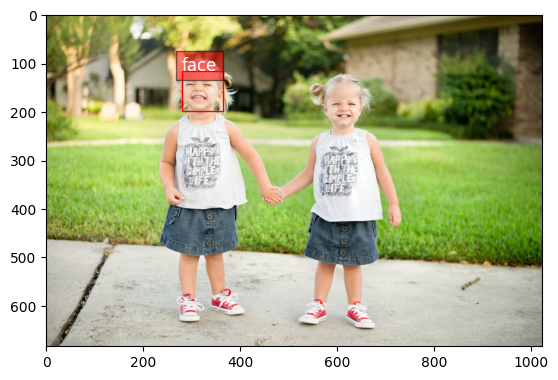

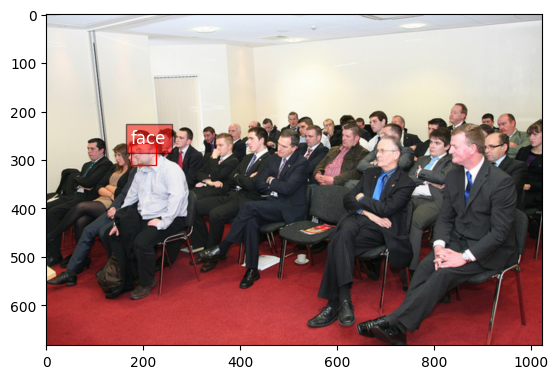

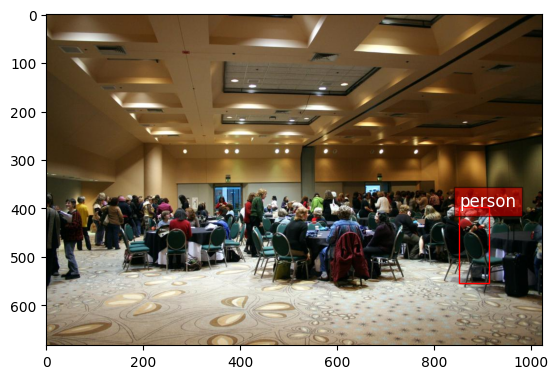

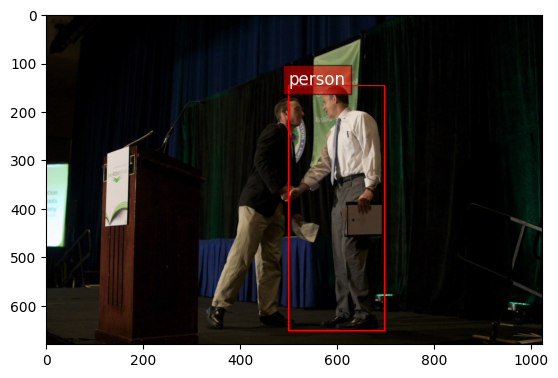

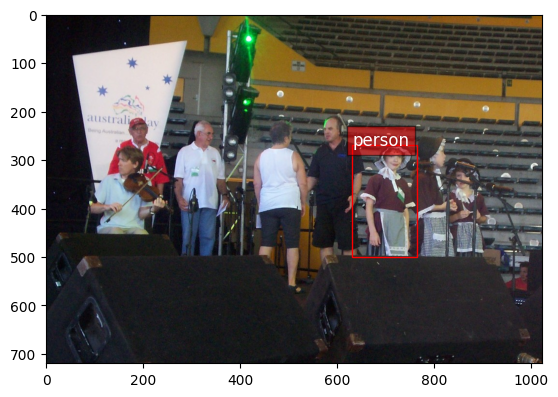

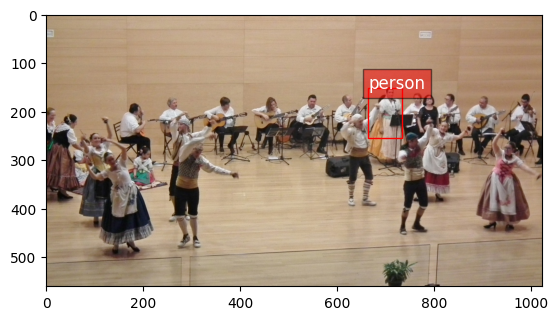

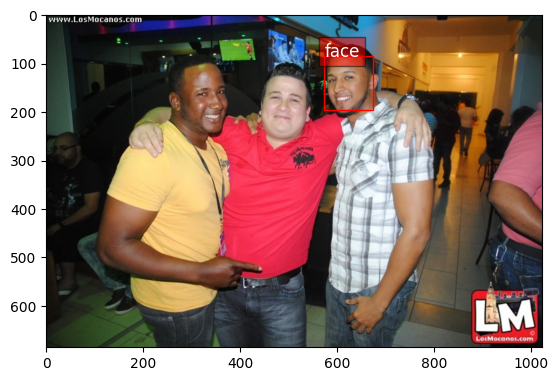

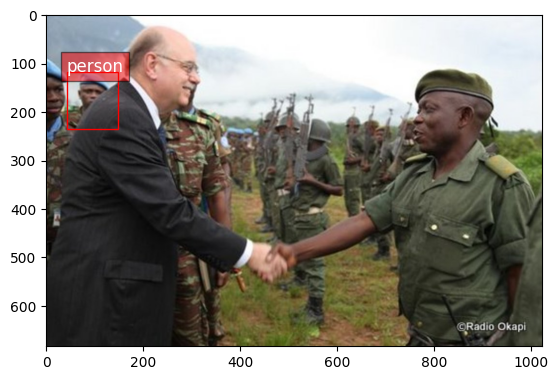

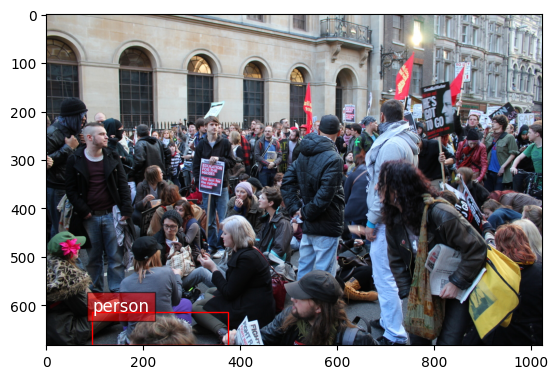

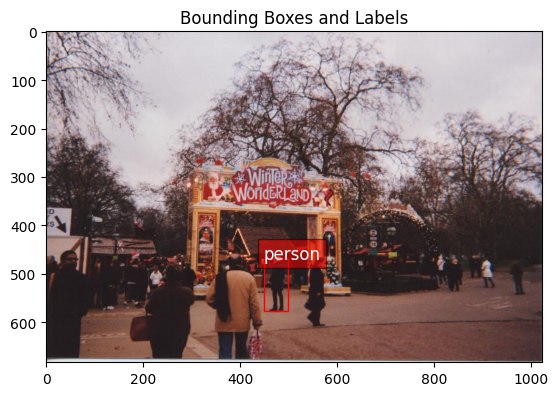

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df_check = df.sample(10)

for index, row in df_check.iterrows():
    fig, ax = plt.subplots()
    # Assuming all images have the same dimensions for this example
    # Adjust accordingly if they differ
    # image_width = 1024
    # image_height = 1024
    # ax.set_xlim(0, image_width)
    # ax.set_ylim(0, image_height)
    # ax.invert_yaxis()  # Invert y axis to match image coordinates


    # Calculate the bottom left corner of the bounding box
    x = row['col_x'] - row['width'] / 2
    y = row['row_y'] - row['height'] / 2
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), row['width'], row['height'], linewidth=1, edgecolor='r', facecolor='none', label=row['label'])
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    # Add label
    plt.text(x, y, row['label'], color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    img = plt.imread(row['filename'])
    ax.imshow(img)

plt.title('Bounding Boxes and Labels')
plt.show()


In [10]:
annotation_df = df.copy()

# Run fastdup 

In [11]:
import fastdup
fd = fastdup.create(input_dir='./')
fd.run(annotations=df, ccthreshold=0.9, overwrite=True, license='magical')

/root/yes/lib/python3.9/site-packages/fastdup/fastdup_controller.py:849: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df_annot[FD.ANNOT_FD_ID] = np.arange(len(self._df_annot)).astype(int)


FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2024-02-20 15:27:32 [INFO] Going to loop over dir /tmp/tmpsxqeeezm.csv
2024-02-20 15:27:34 [INFO] Found total 533448 images to run on, 533448 train, 0 test, name list 533448, counter 533448 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes
2024-02-20 16:31:44 [INFO] Going to loop over dir /tmp/crops_input.csv
2024-02-20 16:31:45 [INFO] Found total 325451 images to run on, 325451 train, 0 test, name list 325451, counter 325451 
2024-02-20 16:56:08 [INFO] Found total 325451 images to run onmated: 0 Minutes
Finished histogram 117.847
Finished bucket sort 119.597
2024-02-20 16:57:44 [INFO] 95980) Finished write_index() NN model
2024-02-20 16:57:44 [INFO] Stored nn model index file work_dir/nnf.index
2024-02-20 16:58:21 [INFO] Total time took 1596688 ms
2024-02-20 16:58:21 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 % of total graph edges
2024-02-20 16:58:2

0

In [57]:
outliers_df = fd.outliers()
outliers_df

outlier  nearest  distance  score_outlier  col_x_outlier  row_y_outlier  width_outlier  height_outlier label_outlier                                                                              crop_filename_outlier                                                                                   filename_outlier   index_x  is_valid_outlier  score_nearest  col_x_nearest  row_y_nearest  width_nearest  height_nearest label_nearest                                                                              crop_filename_nearest                                                                                   filename_nearest   index_y  is_valid_nearest
0       219656    64949  0.514214       0.479181          721.0          229.0            178             216        person  work_dir/crops/21/workspaceyolo_v8_trainingoiv7_fulltrain0c80d9e656798f4a.jpg_721_229_178_216.jpg  work_dir/crops/21/workspaceyolo_v8_trainingoiv7_fulltrain0c80d9e656798f4a.jpg_721_229_178_216.jpg  219656.0              True       0.788308           30.5          250.0             61             164        person     work_dir/crops/6/workspaceyolo_v8_trainingoiv7_fulltrain027d3d5f97ccbecc.jpg_30_250_61_164.jpg     work_dir/crops/6/workspaceyolo_v8_trainingoiv7_fulltrain027d3d5f97ccbecc.jpg_30_250_61_164.jpg   64949.0              True
1       107229    89091  0.549248       0.534080          356.5          520.5            377             277        person  work_dir/crops/10/workspaceyolo_v8_trainingoiv7_fulltrain04ed0e0ae6464246.jpg_356_520_377_277.jpg  work_dir/crops/10/workspaceyolo_v8_trainingoiv7_fulltrain04ed0e0ae6464246.jpg_356_520_377_277.jpg  107229.0              True       0.683662          378.0          110.5            164             143        person   work_dir/crops/8/workspaceyolo_v8_trainingoiv7_fulltrain03cd70b189462016.jpg_378_110_164_143.jpg   work_dir/crops/8/workspaceyolo_v8_trainingoiv7_fulltrain03cd70b189462016.jpg_378_110_164_143.jpg   89091.0              True
2       220736   304137  0.559166       0.800499          375.0          400.5            372             339        person  work_dir/crops/22/workspaceyolo_v8_trainingoiv7_fulltrain0c97be6bbea7c9d9.jpg_375_400_372_339.jpg  work_dir/crops/22/workspaceyolo_v8_trainingoiv7_fulltrain0c97be6bbea7c9d9.jpg_375_400_372_339.jpg  220736.0              True       0.351220          820.5          218.5            129              93        person   work_dir/crops/30/workspaceyolo_v8_trainingoiv7_fulltrain128ae5e291a148df.jpg_820_218_129_93.jpg   work_dir/crops/30/workspaceyolo_v8_trainingoiv7_fulltrain128ae5e291a148df.jpg_820_218_129_93.jpg  304137.0              True
3        25809   273081  0.564857       0.558912          282.5          118.5            557             237        person   work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fulltrain00b082c3dda51382.jpg_282_118_557_237.jpg   work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fulltrain00b082c3dda51382.jpg_282_118_557_237.jpg   25809.0              True       0.824699          404.0          305.5            314             449        person  work_dir/crops/27/workspaceyolo_v8_trainingoiv7_fulltrain104bcfcdc42c029c.jpg_404_305_314_449.jpg  work_dir/crops/27/workspaceyolo_v8_trainingoiv7_fulltrain104bcfcdc42c029c.jpg_404_305_314_449.jpg  273081.0              True
4       175525   157640  0.567281       0.714765          547.5          418.5            231             193        person  work_dir/crops/17/workspaceyolo_v8_trainingoiv7_fulltrain09663240abf13ffb.jpg_547_418_231_193.jpg  work_dir/crops/17/workspaceyolo_v8_trainingoiv7_fulltrain09663240abf13ffb.jpg_547_418_231_193.jpg  175525.0              True       0.722427          340.5          366.0            365             194        person  work_dir/crops/15/workspaceyolo_v8_trainingoiv7_fulltrain08326f55ba52d455.jpg_340_366_365_194.jpg  work_dir/crops/15/workspaceyolo_v8_trainingoiv7_fulltrain08326f55ba52d455.jpg_340_366_365_194.jpg  157640.0              True
...        

In [51]:
annotation_df

filename     score  col_x  row_y  width  height   label
0       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.839814  165.5  854.5    253     271  person
1       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.813446  115.0  370.5    194     449  person
2       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.807047  340.5  820.0    167     250  person
3       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.773999  249.0  401.5    154     379  person
4       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.755840  780.0  343.0    232     294  person
...                                                                  ...       ...    ...    ...    ...     ...     ...
999995  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.732610  381.5  378.5     97     275  person
999996  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.616251  384.0  253.0     64      84  person
999997  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.604764  836.5  411.5     77     137  person
999998  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.556185  769.5  363.5     87     233  person
999999  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.521048  653.0  260.0     72      82  person

[533448 rows x 7 columns]

# Visualize Outliers

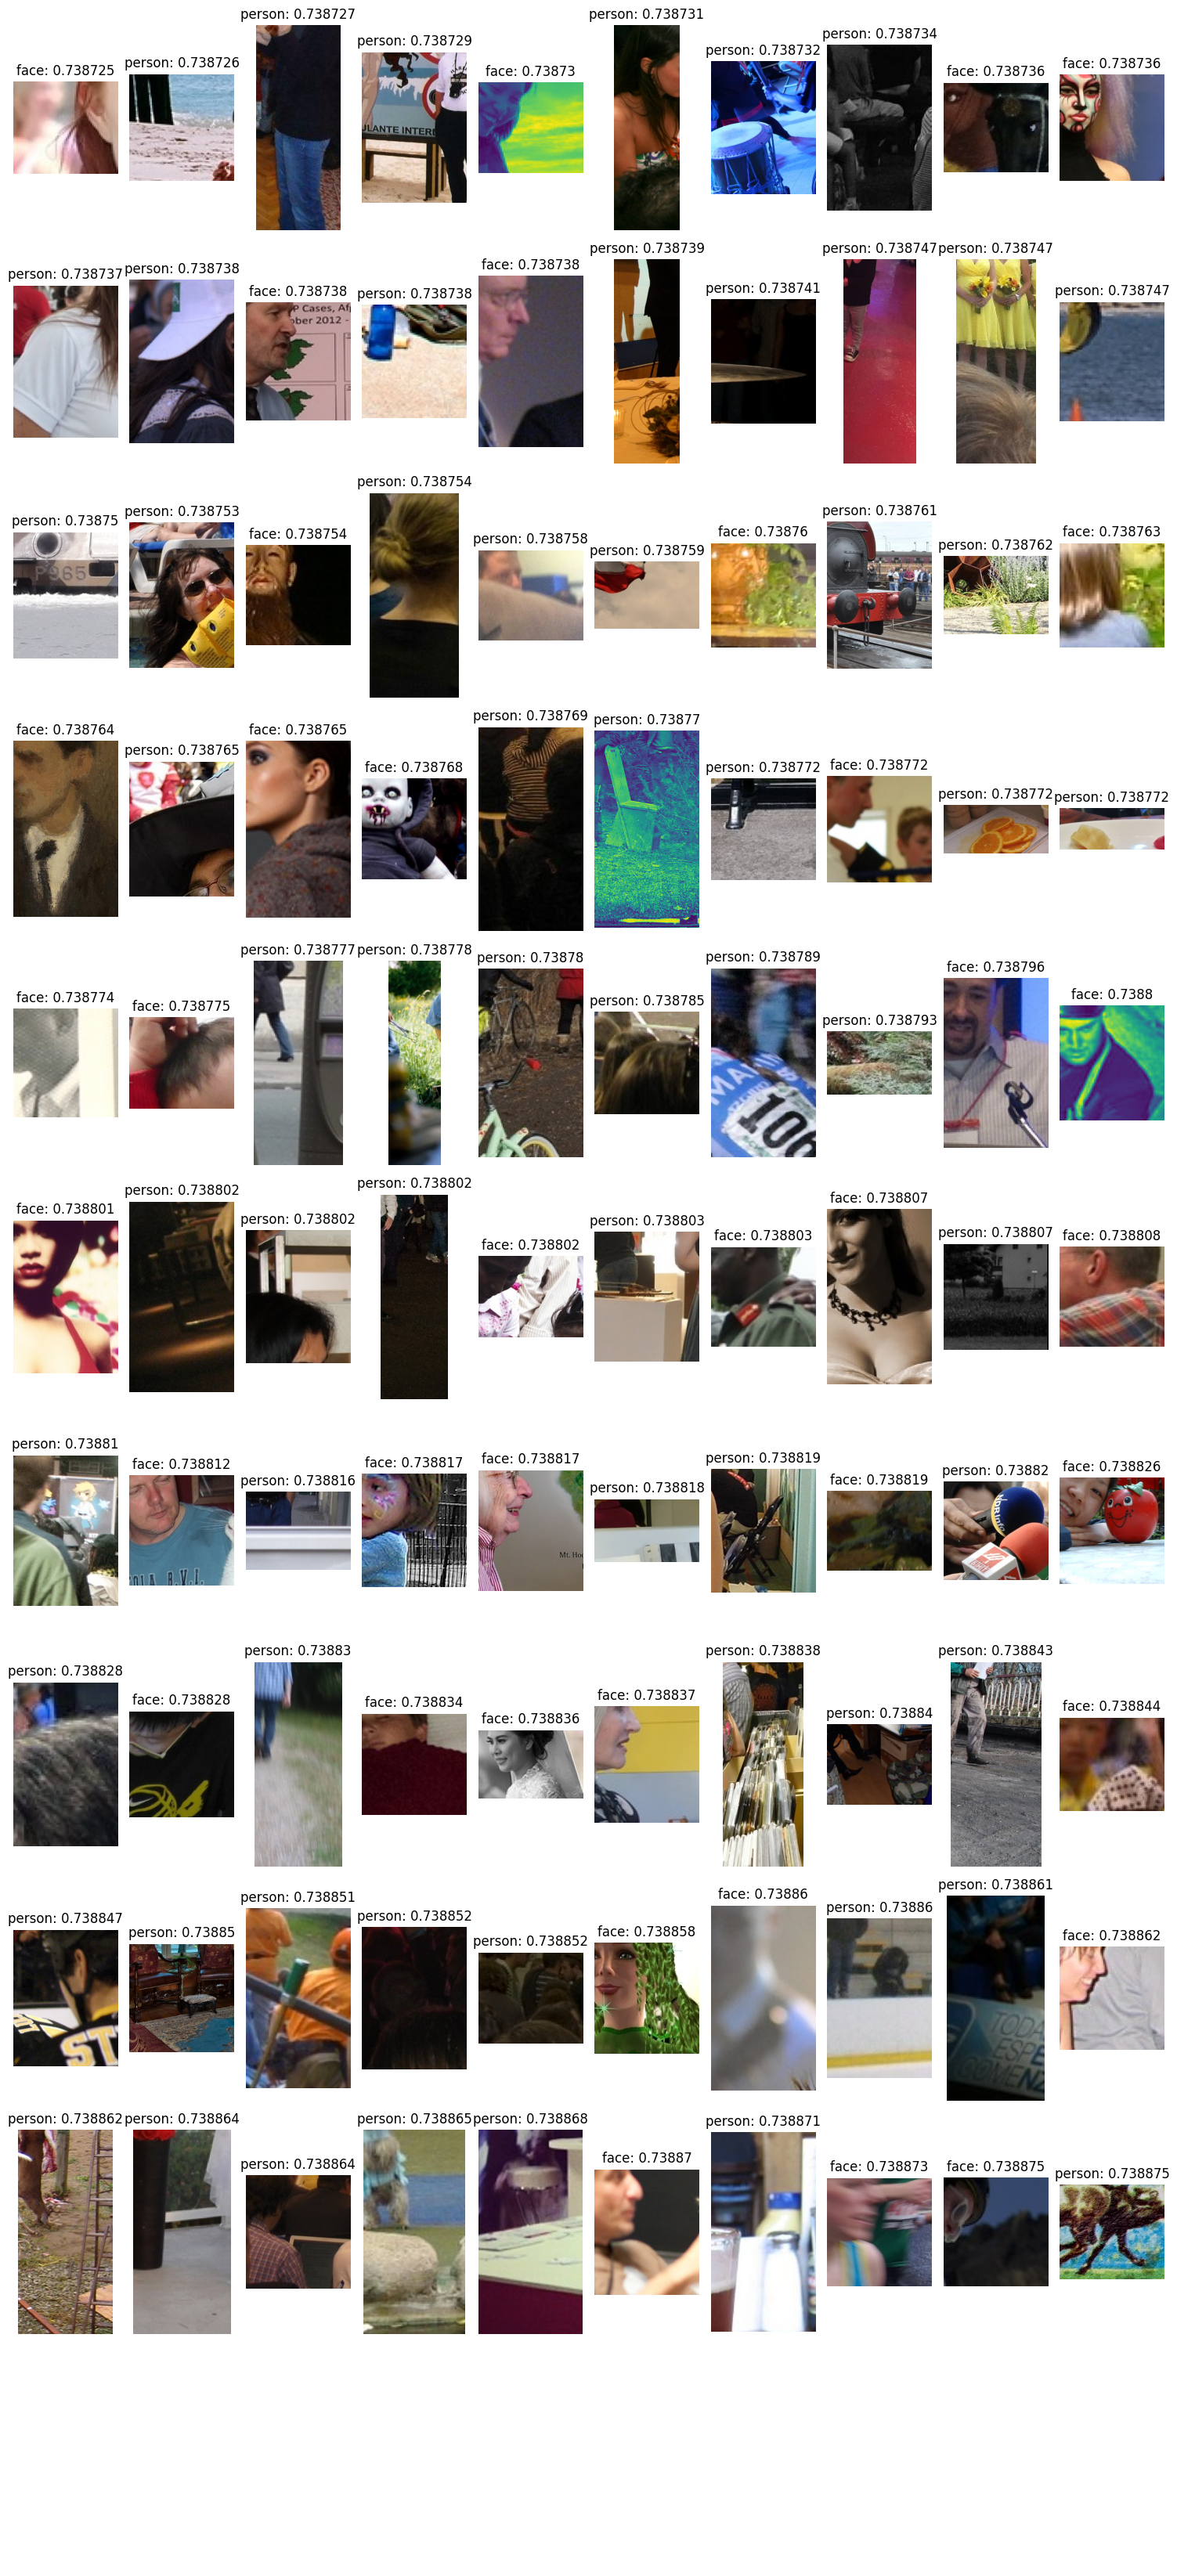

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = outliers_df.tail(100)

# Determine the size of the grid. You might want to adjust ncols and nrows based on your actual dataframe size
nrows = int(len(sample_df)**0.5) + 1  # Simple way to estimate rows needed
ncols = int(len(sample_df) / nrows) + (len(sample_df) % nrows > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))  # Adjust figsize as needed

# Flatten the axes array for easy iteration if it's 2D (for multiple rows and cols)
axes = axes.flatten()

for idx, (index, row) in enumerate(sample_df.iterrows()):
    ax = axes[idx]
    image = mpimg.imread(row['crop_filename_outlier'])
    ax.imshow(image)
    ax.set_title(f"{row['label_outlier']}: {row['distance']}")
    ax.axis('off')  # Hide axes ticks

# Turn off any unused subplots
for ax in axes[idx+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Drop Outliers

In [58]:
# Anything lower than 0.65 are considered to be outliers

outliers_df = outliers_df[outliers_df['distance'] < 0.65]
outliers_df

outlier  nearest  distance  score_outlier  col_x_outlier  row_y_outlier  width_outlier  height_outlier label_outlier                                                                              crop_filename_outlier                                                                                   filename_outlier   index_x  is_valid_outlier  score_nearest  col_x_nearest  row_y_nearest  width_nearest  height_nearest label_nearest                                                                              crop_filename_nearest                                                                                   filename_nearest   index_y  is_valid_nearest
0     219656    64949  0.514214       0.479181          721.0          229.0            178             216        person  work_dir/crops/21/workspaceyolo_v8_trainingoiv7_fulltrain0c80d9e656798f4a.jpg_721_229_178_216.jpg  work_dir/crops/21/workspaceyolo_v8_trainingoiv7_fulltrain0c80d9e656798f4a.jpg_721_229_178_216.jpg  219656.0              True       0.788308           30.5          250.0             61             164        person     work_dir/crops/6/workspaceyolo_v8_trainingoiv7_fulltrain027d3d5f97ccbecc.jpg_30_250_61_164.jpg     work_dir/crops/6/workspaceyolo_v8_trainingoiv7_fulltrain027d3d5f97ccbecc.jpg_30_250_61_164.jpg   64949.0              True
1     107229    89091  0.549248       0.534080          356.5          520.5            377             277        person  work_dir/crops/10/workspaceyolo_v8_trainingoiv7_fulltrain04ed0e0ae6464246.jpg_356_520_377_277.jpg  work_dir/crops/10/workspaceyolo_v8_trainingoiv7_fulltrain04ed0e0ae6464246.jpg_356_520_377_277.jpg  107229.0              True       0.683662          378.0          110.5            164             143        person   work_dir/crops/8/workspaceyolo_v8_trainingoiv7_fulltrain03cd70b189462016.jpg_378_110_164_143.jpg   work_dir/crops/8/workspaceyolo_v8_trainingoiv7_fulltrain03cd70b189462016.jpg_378_110_164_143.jpg   89091.0              True
2     220736   304137  0.559166       0.800499          375.0          400.5            372             339        person  work_dir/crops/22/workspaceyolo_v8_trainingoiv7_fulltrain0c97be6bbea7c9d9.jpg_375_400_372_339.jpg  work_dir/crops/22/workspaceyolo_v8_trainingoiv7_fulltrain0c97be6bbea7c9d9.jpg_375_400_372_339.jpg  220736.0              True       0.351220          820.5          218.5            129              93        person   work_dir/crops/30/workspaceyolo_v8_trainingoiv7_fulltrain128ae5e291a148df.jpg_820_218_129_93.jpg   work_dir/crops/30/workspaceyolo_v8_trainingoiv7_fulltrain128ae5e291a148df.jpg_820_218_129_93.jpg  304137.0              True
3      25809   273081  0.564857       0.558912          282.5          118.5            557             237        person   work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fulltrain00b082c3dda51382.jpg_282_118_557_237.jpg   work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fulltrain00b082c3dda51382.jpg_282_118_557_237.jpg   25809.0              True       0.824699          404.0          305.5            314             449        person  work_dir/crops/27/workspaceyolo_v8_trainingoiv7_fulltrain104bcfcdc42c029c.jpg_404_305_314_449.jpg  work_dir/crops/27/workspaceyolo_v8_trainingoiv7_fulltrain104bcfcdc42c029c.jpg_404_305_314_449.jpg  273081.0              True
4     175525   157640  0.567281       0.714765          547.5          418.5            231             193        person  work_dir/crops/17/workspaceyolo_v8_trainingoiv7_fulltrain09663240abf13ffb.jpg_547_418_231_193.jpg  work_dir/crops/17/workspaceyolo_v8_trainingoiv7_fulltrain09663240abf13ffb.jpg_547_418_231_193.jpg  175525.0              True       0.722427          340.5          366.0            365             194        person  work_dir/crops/15/workspaceyolo_v8_trainingoiv7_fulltrain08326f55ba52d455.jpg_340_366_365_194.jpg  work_dir/crops/15/workspaceyolo_v8_trainingoiv7_fulltrain08326f55ba52d455.jpg_340_366_365_194.jpg  157640.0              True
..       ...      ...

In [60]:
outliers_df.rename(columns={'score_outlier':'score', 
                            'col_x_outlier':'col_x', 
                            'row_y_outlier':'row_y', 
                            'width_outlier':'width', 
                            'height_outlier':'height', 
                            'label_outlier':'label', 
                            'distance': 'outlier_distance'}, inplace=True)

outliers_df = outliers_df[['score',	'col_x','row_y','width','height','label', 'outlier_distance']] 
outliers_df

/tmp/ipykernel_80772/3292701937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.rename(columns={'score_outlier':'score',


score  col_x  row_y  width  height   label  outlier_distance
0    0.479181  721.0  229.0    178     216  person          0.514214
1    0.534080  356.5  520.5    377     277  person          0.549248
2    0.800499  375.0  400.5    372     339  person          0.559166
3    0.558912  282.5  118.5    557     237  person          0.564857
4    0.714765  547.5  418.5    231     193  person          0.567281
..        ...    ...    ...    ...     ...     ...               ...
374  0.351097  350.0  705.5     82      41  person          0.649890
375  0.402676  718.0  355.0     74      58    face          0.649908
376  0.581343  452.5  459.5    149     185  person          0.649915
377  0.818238  254.0  374.0    208     230  person          0.649964
378  0.673721  731.5  290.0    109     130    face          0.649997

[379 rows x 7 columns]

In [61]:
# Perform the merge with an indicator and include 'distance' from outliers_df
merged_df = annotation_df.merge(outliers_df, on=['col_x', 'row_y', 'width', 'height', 'label', 'score'], how='left', indicator=True)

# Create the 'outlier' column based on the '_merge' indicator
merged_df['outlier'] = merged_df['_merge'] == 'both'

# After the merge, 'distance' column from outliers_df is included in merged_df.
# Rows from annotation_df without a match in outliers_df will have NaN values in 'distance'.

# Drop the '_merge' column as it's no longer needed
merged_df = merged_df.drop('_merge', axis=1)

# Optional: Reset the index
merged_df = merged_df.reset_index(drop=True)

# The resulting dataframe now includes 'distance' and a new 'outlier' column marking true for outliers
updated_annotations = merged_df


In [62]:
updated_annotations

filename     score  col_x  row_y  width  height   label  outlier_distance  outlier
0       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.839814  165.5  854.5    253     271  person               NaN    False
1       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.813446  115.0  370.5    194     449  person               NaN    False
2       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.807047  340.5  820.0    167     250  person               NaN    False
3       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.773999  249.0  401.5    154     379  person               NaN    False
4       /workspace/yolo_v8_training/oiv7_full/train/000002b66c9c498e.jpg  0.755840  780.0  343.0    232     294  person               NaN    False
...                                                                  ...       ...    ...    ...    ...     ...     ...               ...      ...
533443  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.732610  381.5  378.5     97     275  person               NaN    False
533444  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.616251  384.0  253.0     64      84  person               NaN    False
533445  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.604764  836.5  411.5     77     137  person               NaN    False
533446  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.556185  769.5  363.5     87     233  person               NaN    False
533447  /workspace/yolo_v8_training/oiv7_full/train/14152d9d5c139253.jpg  0.521048  653.0  260.0     72      82  person               NaN    False

[533448 rows x 9 columns]

In [64]:
updated_annotations.to_parquet(f"parquets/clean_{parquet_filename}")

In [65]:
# !rm -r work_dir